In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# read the tweet_cluster_mapping that we have prepared and train the best performing classifier
# logistic regression after splitting the dataset into training and testing (0.67 & 0.33 ratio)
df = pd.read_csv('tweet_cluster_mapping.csv')

# the best performing model is - LogisticRegression, retraining the model for deeper insights
# into misclassification
model = LogisticRegression(random_state=0)

# vectorizing the tweets for analysis using tf-idf methods
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2',
                        encoding='latin-1', ngram_range=(1, 2),
                        stop_words='english')

# extracting features from the tf-idf vectorization output on the tweets
features = tfidf.fit_transform(df['tweet']).toarray()
labels = df['cluster_number']

# split the dataset into training and testing (0.67 & 0.33 ratio)
X_train, X_test, y_train, y_test, indices_train, indices_test = \
    train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [3]:
# using the trained logistic regression model, predict the labels on the test_dataset
y_pred = model.predict(X_test)

# compute the confusion matrix from the ground_truth labels and the model generated prediction labels
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[ 62  77   4   9   2  32  11]
 [ 20 248   7   4   3  48  10]
 [ 15  68  15   5   1  34   7]
 [ 15  50   3  17   3  10   1]
 [ 21  56   7   3  12  20   4]
 [ 37 103   6   1   2 121   5]
 [ 18  54   2   2   1  20  21]]


In [4]:
# classification report showing the main classification metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.33      0.31      0.32       197
         1.0       0.38      0.73      0.50       340
         2.0       0.34      0.10      0.16       145
         3.0       0.41      0.17      0.24        99
         4.0       0.50      0.10      0.16       123
         5.0       0.42      0.44      0.43       275
         6.0       0.36      0.18      0.24       118

    accuracy                           0.38      1297
   macro avg       0.39      0.29      0.29      1297
weighted avg       0.39      0.38      0.34      1297



Text(0.5, 42.0, 'Predicted')

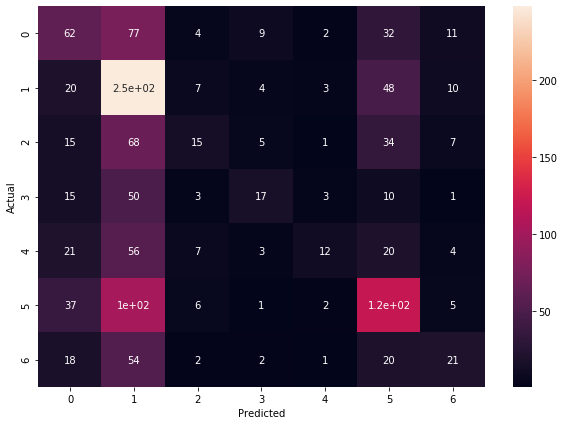

In [5]:
# plotting the confusion matrix in terms of a heatmap using seaborn library

df_cm = pd.DataFrame(conf_mat, index = [i for i in "0123456"],
                  columns = [i for i in "0123456"])
plt.figure(figsize=(10,7))
sns.heatmap(df_cm, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [6]:
# analyzing the mis-classifications of the best performing model for deeper insights
N = 2 # number of n-grams we want to extract for our analysis

cluster_indices = sorted(df['cluster_number'].unique().tolist())
for cluster_number in cluster_indices:
    indices = np.argsort(model.coef_[int(cluster_number)])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(int(cluster_number)))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# '0':
  . Top unigrams:
       . video
       . savile
  . Top bigrams:
       . video ebola
       . video uk
# '1':
  . Top unigrams:
       . aampe
       . hospital
  . Top bigrams:
       . dementia patients
       . special measures
# '2':
  . Top unigrams:
       . cigarettes
       . linked
  . Top bigrams:
       . cancer drug
       . nhs staff
# '3':
  . Top unigrams:
       . warning
       . review
  . Top bigrams:
       . aampe waiting
       . video warning
# '4':
  . Top unigrams:
       . video
       . discovery
  . Top bigrams:
       . video ebola
       . video mental
# '5':
  . Top unigrams:
       . young
       . emergency
  . Top bigrams:
       . video mental
       . mental health
# '6':
  . Top unigrams:
       . ebola
       . antibiotics
  . Top bigrams:
       . hospital death
       . cancer patients
